### Load Packages

In [1]:
# Load all the libraries
# Libraries to load 
import tensorflow as tf
import csv


import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

# Interpretability
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings 

Loaded all libraries


In [2]:
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    LeakyReLU,
    Add,
    BatchNormalization,
    Dense,
    GlobalAveragePooling2D,
    Dropout
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

### 1. Load Dataset

#### 1.1 Load Dataset

In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
!unzip "/gdrive/MyDrive/Data Science/UNI/Big Data/Final Project/Data/asl_alphabet_test.zip" -d "/content/test"

Archive:  /gdrive/MyDrive/Data Science/UNI/Big Data/Final Project/Data/asl_alphabet_test.zip
   creating: /content/test/asl_alphabet_test/
  inflating: /content/test/asl_alphabet_test/space_test.jpg  
  inflating: /content/test/asl_alphabet_test/nothing_test.jpg  
  inflating: /content/test/asl_alphabet_test/Z_test.jpg  
  inflating: /content/test/asl_alphabet_test/Y_test.jpg  
  inflating: /content/test/asl_alphabet_test/X_test.jpg  
  inflating: /content/test/asl_alphabet_test/W_test.jpg  
  inflating: /content/test/asl_alphabet_test/V_test.jpg  
  inflating: /content/test/asl_alphabet_test/U_test.jpg  
  inflating: /content/test/asl_alphabet_test/T_test.jpg  
  inflating: /content/test/asl_alphabet_test/S_test.jpg  
  inflating: /content/test/asl_alphabet_test/R_test.jpg  
  inflating: /content/test/asl_alphabet_test/Q_test.jpg  
  inflating: /content/test/asl_alphabet_test/P_test.jpg  
  inflating: /content/test/asl_alphabet_test/O_test.jpg  
  inflating: /content/test/asl_alphabet

In [6]:
!unzip "/gdrive/MyDrive/Data Science/UNI/Big Data/Final Project/Data/asl_alphabet_train.zip" -d "/content/train"

Output streaming troncato alle ultime 5000 righe.
  inflating: /content/train/asl_alphabet_train/B/B787.jpg  
  inflating: /content/train/asl_alphabet_train/B/B785.jpg  
  inflating: /content/train/asl_alphabet_train/B/B781.jpg  
  inflating: /content/train/asl_alphabet_train/B/B78.jpg  
  inflating: /content/train/asl_alphabet_train/B/B775.jpg  
  inflating: /content/train/asl_alphabet_train/B/B774.jpg  
  inflating: /content/train/asl_alphabet_train/B/B770.jpg  
  inflating: /content/train/asl_alphabet_train/B/B77.jpg  
  inflating: /content/train/asl_alphabet_train/B/B767.jpg  
  inflating: /content/train/asl_alphabet_train/B/B765.jpg  
  inflating: /content/train/asl_alphabet_train/B/B764.jpg  
  inflating: /content/train/asl_alphabet_train/B/B763.jpg  
  inflating: /content/train/asl_alphabet_train/B/B758.jpg  
  inflating: /content/train/asl_alphabet_train/B/B746.jpg  
  inflating: /content/train/asl_alphabet_train/B/B744.jpg  
  inflating: /content/train/asl_alphabet_train/B/B74

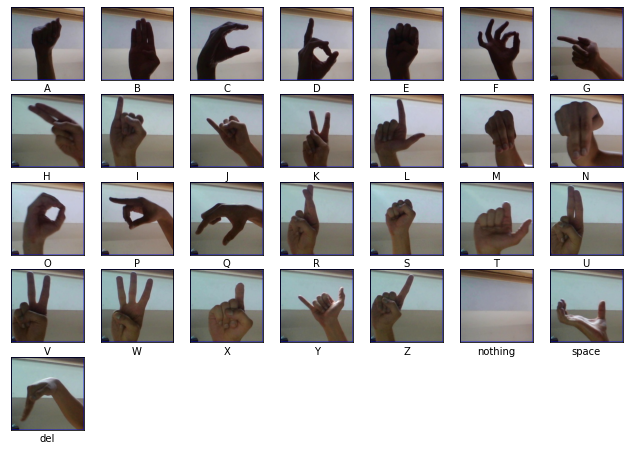

In [4]:
# Show images
train_dir = '/content/train/asl_alphabet_train'
test_dir = '/content/test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']


plt.figure(figsize=(11, 11))
for i in range (0,29):

    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])


#### 1.2 Pre-process Dataset

I splitted the initial Training dataset into Training/Validation, while applying some data augmentation

In [8]:
train_gen = ImageDataGenerator( 
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        validation_split = 0.2
)



train_data = train_gen.flow_from_directory(
                train_dir,
                target_size = (200,200),
                batch_size = 128,
                class_mode = 'categorical',
                subset = 'training'
)


test_directory = ''
test_data = train_gen.flow_from_directory(
                train_dir,
                target_size = (200,200),
                batch_size = 128,
                class_mode = 'categorical',
                subset = 'validation'
)

classes = list(train_data.class_indices)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


### 2. Deep Learning models

In [9]:
model_dir = '/gdrive/MyDrive/Data Science/UNI/Big Data/Final Project/Models'
plot_dir = '/gdrive/MyDrive/Data Science/UNI/Big Data/Final Project/Plots'

#### 2.1 Classic CNN

In [ ]:
 data_shape = train_data[0][0].shape[1:]

In [ ]:
model = Sequential()

#1 conv layer
model.add(Conv2D(filters = 16, kernel_size = 3, activation = "relu", input_shape = data_shape))

#1 max pool layer
model.add(MaxPooling2D(pool_size = 3))

#2 conv layer
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size = 3))

#3 conv layer
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size = 3))

model.add(BatchNormalization())

model.add(Flatten())

#1 dense layer
model.add(Dense(1000, input_shape = data_shape, activation = "relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(500, activation = "relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(29,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 6, 64)          2

In [ ]:
early_stopping = EarlyStopping(
        monitor='val_loss',patience=5,
        min_delta = 0.001
)
reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',patience=5
)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['acc'])

history_cnn = model.fit(train_data,
                        epochs=20,
                        validation_data=test_data, 
                        shuffle = True,
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/20
544/544 [==============================] - 756s 1s/step - loss: 2.7191 - acc: 0.2636 - val_loss: 2.2172 - val_acc: 0.3654
Epoch 2/20
544/544 [==============================] - 713s 1s/step - loss: 0.6951 - acc: 0.7685 - val_loss: 1.0760 - val_acc: 0.6542
Epoch 3/20
544/544 [==============================] - 713s 1s/step - loss: 0.3982 - acc: 0.8649 - val_loss: 1.1479 - val_acc: 0.6668
Epoch 4/20
544/544 [==============================] - 712s 1s/step - loss: 0.2880 - acc: 0.9043 - val_loss: 1.1190 - val_acc: 0.6918
Epoch 5/20
544/544 [==============================] - 712s 1s/step - loss: 0.2386 - acc: 0.9204 - val_loss: 0.8113 - val_acc: 0.7716
Epoch 6/20
544/544 [==============================] - 712s 1s/step - loss: 0.2035 - acc: 0.9300 - val_loss: 0.8538 - val_acc: 0.7651
Epoch 7/20
544/544 [==============================] - 712s 1s/step - loss: 0.1701 - acc: 0.9430 - val_loss: 1.2036 - val_acc: 0.7031
Epoch 8/20
544/544 [==============================] - 710s 1s/step - 

In [ ]:
model.save(model_dir+'/cnn.h5')

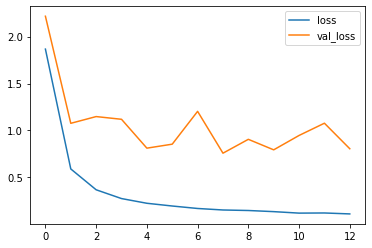

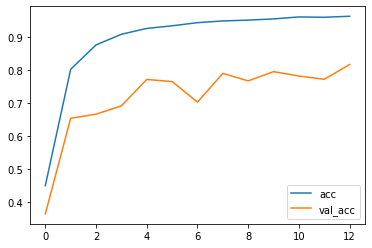

In [ ]:
history_frame = pd.DataFrame(history_cnn.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['acc', 'val_acc']].plot();

In [ ]:
history_frame.to_csv(model_dir+'/history_cnn', sep='\t')

In [ ]:
# Load results
history_load_cnn = pd.read_csv(model_dir+'/history_cnn', sep='\t')

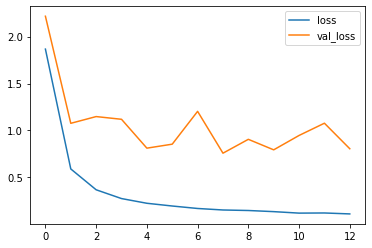

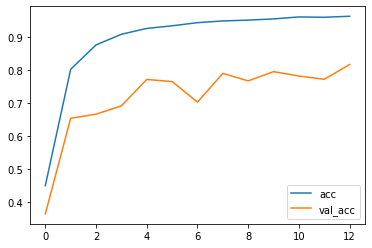

In [ ]:
# Save Plots
loss_cnn = history_load_cnn.loc[:, ['loss', 'val_loss']].plot()
fig_loss_cnn = loss_cnn.get_figure()
fig_loss_cnn.savefig(plot_dir+'/loss_cnn.png')

acc_cnn = history_load_cnn.loc[:, ['acc', 'val_acc']].plot()
fig_acc_cnn = acc_cnn.get_figure()
fig_acc_cnn.savefig(plot_dir+'/acc_cnn.png')

#### 2.2 DarkModel

In [ ]:
def DarknetConv(inputs, filters, kernel_size, strides):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides,padding='same')(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    
    return x

def DarknetResidual(inputs, filters):
    shortcut = inputs
    x = DarknetConv(inputs, filters//2,kernel_size=(1,1),strides=(1,1))
    x = DarknetConv(x, filters, kernel_size=(3,3),strides=(1,1))
    x = Add()([x, shortcut])
    return x

In [ ]:
inputs = Input(shape=(200,200,3))
x = DarknetConv(inputs, 32, kernel_size=(3,3),strides=(1,1))

x = DarknetConv(x, 64, kernel_size=(3,3), strides=(2,2))

for _ in range(1):
    x = DarknetResidual(x, 64)
    
x = DarknetConv(x, 128, kernel_size=(3,3), strides=(2,2))

for _ in range(2):
    x = DarknetResidual(x, 128)
    
x = DarknetConv(x, 256, kernel_size=(3,3), strides=(2,2))

for _ in range(8):
    x = DarknetResidual(x, 256)
    
x = DarknetConv(x, 512, kernel_size=(3,3), strides=(2,2))

for _ in range(8):
    x = DarknetResidual(x, 512)
    
x = DarknetConv(x, 1024, kernel_size=(3,3), strides=(2,2))

for _ in range(4):
    x = DarknetResidual(x, 1024)
    
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)


output = Dense(29,activation='softmax')(x)

darknet = Model(inputs, output)

In [ ]:
darknet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 200, 200, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 200, 200, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 200, 200, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
darknet.compile(optimizer='adam', loss='categorical_crossentropy',
               metrics=['acc'])

history = darknet.fit(train_data,
                        epochs=7,
                        validation_data=validation_data,
                        callbacks=[early_stopping, reduce_lr])




Epoch 1/7
2175/2175 [==============================] - 1127s 516ms/step - loss: 0.1236 - acc: 0.9678 - val_loss: 0.4841 - val_acc: 0.8671
Epoch 2/7
2175/2175 [==============================] - 1114s 512ms/step - loss: 0.1140 - acc: 0.9710 - val_loss: 0.6191 - val_acc: 0.8731
Epoch 3/7
2175/2175 [==============================] - 1118s 514ms/step - loss: 0.0832 - acc: 0.9777 - val_loss: 0.2786 - val_acc: 0.9267
Epoch 4/7
2175/2175 [==============================] - 1124s 517ms/step - loss: 0.0850 - acc: 0.9780 - val_loss: 0.3094 - val_acc: 0.9246
Epoch 5/7
2175/2175 [==============================] - 1118s 514ms/step - loss: 0.0900 - acc: 0.9778 - val_loss: 0.3989 - val_acc: 0.9021
Epoch 6/7
2175/2175 [==============================] - 1123s 516ms/step - loss: 0.0691 - acc: 0.9816 - val_loss: 0.2070 - val_acc: 0.9444
Epoch 7/7
2175/2175 [==============================] - 1120s 515ms/step - loss: 0.0809 - acc: 0.9812 - val_loss: 0.3103 - val_acc: 0.9441


In [ ]:
darknet.save(model_dir+'/asl_darknet.h5')

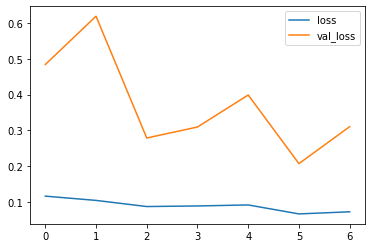

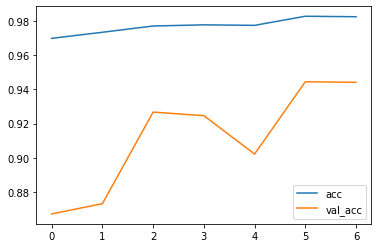

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [ ]:
import csv
history_frame.to_csv(model_dir+'/history_dark', sep='\t')


In [ ]:
# Load results
history_load_dark = pd.read_csv(model_dir+'/history_dark', sep='\t')

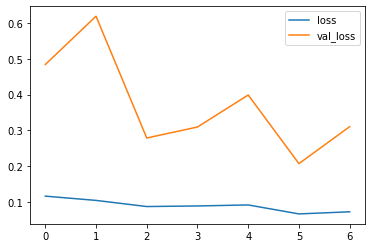

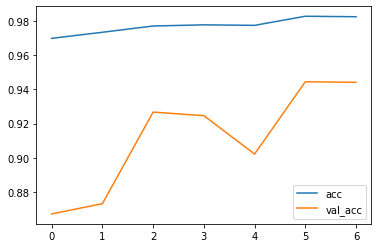

In [ ]:
# Save Plots
loss_cnn = history_load_dark.loc[:, ['loss', 'val_loss']].plot()
fig_loss_cnn = loss_cnn.get_figure()
fig_loss_cnn.savefig(plot_dir+'/loss_dark.png')

acc_cnn = history_load_dark.loc[:, ['acc', 'val_acc']].plot()
fig_acc_cnn = acc_cnn.get_figure()
fig_acc_cnn.savefig(plot_dir+'/acc_dark.png')

### 3. Error Analysis

 Image of prediction vs actual label

In [6]:
# It can be used to reconstruct the model identically.
dark_net = keras.models.load_model("/gdrive/MyDrive/Data Science/UNI/Big Data/Final Project/Models/asl_darknet.h5")
conv_net = keras.models.load_model("/gdrive/MyDrive/Data Science/UNI/Big Data/Final Project/Models/cnn.h5")

#### 3.1 Evaluation analysis (DarkNet)

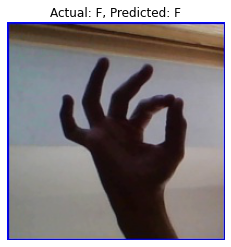

In [ ]:
sample = np.array(Image.open(test_dir+'/F_test.jpg'))
sample_fed = np.expand_dims(sample, 0)
pred= dark_net.predict(sample_fed)
pred = classes[np.argmax(pred)]
plt.imshow(sample)
plt.title("Actual: F, Predicted: {}".format(pred))
plt.axis('off')
plt.show()

I'm considering only one batch of images (128)

In [ ]:
# Test
image_batch, label_batch = next(iter(test_data))

class_names = np.array(classes)

In [ ]:
dark_net.evaluate(image_batch,label_batch,verbose=0)

[0.0930556058883667, 0.9765625]

In [ ]:
pred_dark = dark_net.predict(image_batch)
predictions = np.argmax(pred_dark,axis=1)
y_test = predictions = np.argmax(label_batch,axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         4
          17       1.00    

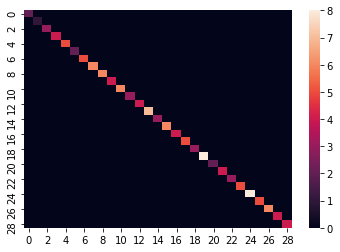

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions))
plt.show()

### 4. Adversarial Attack

For this part of the homework I decided to perform **adversarial attack**, the library I picked was *_Foolbox_*.

**Method:**

As for the method, I picked the one seen in the course, the FGSM (fast gradient sign method) that adds noise to the initial image. This noise has a weight $\epsilon$, it's the impact that it will have on the original image. The key concept is that we are adding a vector of small variations whose elements are equal to the sign of those of the gradient of the cost function (with respect to the input).

**Approach:**

I did as follows:


*   Attack the first model (the one created from scratch)

    *   Plot how the accuracy decreases while $\epsilon$ increases
    *   Show that the original image and the one attacked are visually similar but pixel-wise different.


*   Attack the second model (DarkNet)

    *   Plot how the accuracy decreases while $\epsilon$ increases
    *   Why did I pick two different models? The first reason is because the accuracy score of the first model wasn't too high to start withn and after a couple of trials with different models I decided to use transfer learning. The second reason is because I wanted to test wether the accuracy of better-performing models would tend to decrease so rapidly.

**Results:**

As the paper suggests both models get hit with small values of $\epsilon$ as well.

*   Model 1 takes a big hit at the beginning, but with the growth of $\epsilon$ the slope tends to decrease. 
*   Model 2 decreases more smoothly with the growth of $\epsilon$. 





In [ ]:
!pip3 install foolbox==3.1.1

In [7]:
import foolbox as fb
import eagerpy as ep

#### Single attack on two images

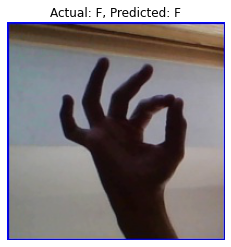

In [ ]:
sample = np.array(Image.open(test_dir+'/F_test.jpg'))
sample_fed = np.expand_dims(sample, 0)
pred= dark_net.predict(sample_fed)
pred = classes[np.argmax(pred)]
plt.imshow(sample)
plt.title("Actual: F, Predicted: {}".format(pred))
plt.axis('off')
plt.show()

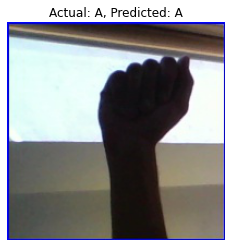

In [ ]:
sample2 = np.array(Image.open(test_dir+'/A_test.jpg'))
sample_fed = np.expand_dims(sample2, 0)
pred= dark_net.predict(sample_fed)
pred = classes[np.argmax(pred)]
plt.imshow(sample2)
plt.title("Actual: A, Predicted: {}".format(pred))
plt.axis('off')
plt.show()

In [ ]:
# Convert datatype
sample = sample.astype(np.float32)
sample2 = sample2.astype(np.float32)

samples = []
samples.append(sample)
samples.append(sample2)

In [ ]:
labels_sample = np.asarray([5, 0], dtype=np.int64)

In [ ]:
image = tf.convert_to_tensor(samples)
label = tf.convert_to_tensor(labels_sample)

In [ ]:
# EAGER PY
# Just wraps a native tensor using EagerPy
image = ep.astensor(image)
label = ep.astensor(label)

In [ ]:
# Returns a new model with the desired bounds and updates the preprocessing accordingly
bounds = (0, 255) 
fmodel = fb.TensorFlowModel(dark_net, bounds=bounds)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [ ]:
# This is the accuracy we get without the adversarial attack
fb.utils.accuracy(fmodel, image, label)

1.0

In [ ]:
#Run attack 
attack = fb.attacks.FGSM()

In [ ]:
# This is just to show what happens if we only take one epsilon
raw, clipped, is_adv = attack(fmodel, image, label, epsilons=0.5)

In [ ]:
robust_accuracy = 1 - is_adv.float32().mean(axis=-1)

In [ ]:
robust_accuracy

TensorFlowTensor(<tf.Tensor: shape=(), dtype=float32, numpy=0.5>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


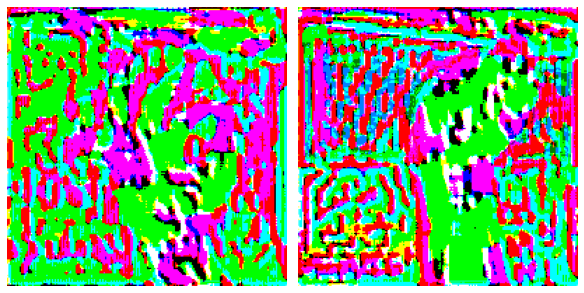

In [ ]:
# This is what the noise looks like
fb.plot.images(raw - image, n=2, bounds=(-0.1, 0.1), scale=4.)

#### 4.1 Attack DarkNet

In [8]:
# split data and labels for TEST
images, labels = next(iter(test_data))

In [9]:
images = tf.convert_to_tensor(images)
labels = tf.convert_to_tensor(np.argmax(labels,axis=1))

In [10]:
# EAGER PY
# Just wraps a native tensor using EagerPy
images = ep.astensor(images)
labels = ep.astensor(labels)

In [11]:
# Returns a new model with the desired bounds and updates the preprocessing accordingly
bounds = (0, 255) 
fmodel = fb.TensorFlowModel(dark_net, bounds=bounds)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [12]:
# This is the accuracy we get without the adversarial attack
fb.utils.accuracy(fmodel, images, labels)

0.984375

In [13]:
#Run attack 
attack = fb.attacks.FGSM()

Multiple EPSILONS

In [14]:
# We are going to take a list of epsilons
epsilons = np.linspace(0.0, 2., num=20)
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

In [15]:
robust_accuracy = 1 - is_adv.float32().mean(axis=-1)

In [16]:
robust_accuracy

TensorFlowTensor(<tf.Tensor: shape=(20,), dtype=float32, numpy=
                 array([0.984375, 0.96875 , 0.953125, 0.9375  , 0.921875, 0.84375 ,
                        0.78125 , 0.734375, 0.640625, 0.59375 , 0.515625, 0.484375,
                        0.421875, 0.359375, 0.3125  , 0.28125 , 0.265625, 0.25    ,
                        0.1875  , 0.1875  ], dtype=float32)>)

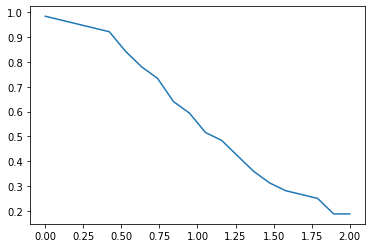

In [17]:
plt.plot(epsilons, robust_accuracy.numpy())


#### 4.2 Attack on CNN model

In [ ]:
# Returns a new model with the desired bounds and updates the preprocessing accordingly
bounds = (0, 255) 
fmodel = fb.TensorFlowModel(conv_net, bounds=bounds)

In [ ]:
# This is the accuracy we get without the adversarial attack
fb.utils.accuracy(fmodel, images, labels)

0.828125

In [ ]:
#Run attack 
attack = fb.attacks.FGSM()

In [ ]:
# We are going to take a list of epsilons
epsilons = np.linspace(0.0, 2., num=20)
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

In [ ]:
robust_accuracy = 1 - is_adv.float32().mean(axis=-1)

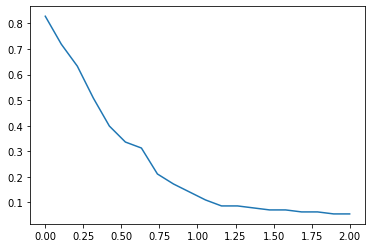

In [ ]:
plt.plot(epsilons, robust_accuracy.numpy())


### 5. Interpretability 

In [ ]:
sample = np.array(Image.open(test_dir+'/F_test.jpg'))
sample_fed = np.expand_dims(sample, 0)
pred= dark_net.predict(sample_fed)
pred = classes[np.argmax(pred)]
plt.imshow(sample)
plt.title("Actual: F, Predicted: {}".format(pred))
plt.axis('off')
plt.show()

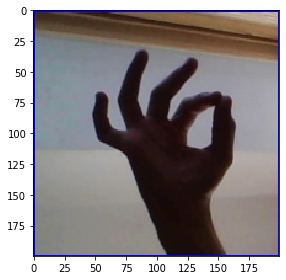

In [ ]:
Xi = skimage.io.imread(test_dir+'/F_test.jpg')
skimage.io.imshow(Xi) # Show image before inception preprocessing

In [ ]:
np.random.seed(222)
preds = dark_net.predict(Xi[np.newaxis,:,:,:])

In [ ]:
top_pred_classes = preds[0].argsort()[-5:][::-1]
top_pred_classes                #Index of top 5 classes

array([ 5,  9, 15, 22, 14])

In [ ]:
# Perturbation of the image
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

24

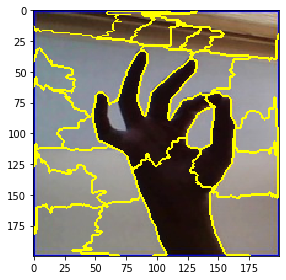

In [ ]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi, superpixels))


In [ ]:
# Create random perturbations 
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations[0] #Show example of perturbation

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0])

In [ ]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


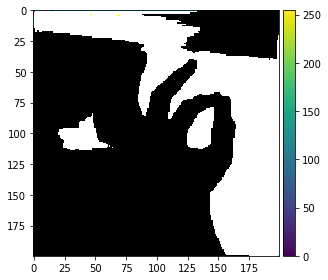

In [ ]:
skimage.io.imshow(perturb_image(Xi,perturbations[0],superpixels))


In [ ]:
# Predict classes of new generated image
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = dark_net.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

(150, 1, 29)

In [ ]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

(150,)

In [ ]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(150,)

In [ ]:
# Step 4 fit linear model
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([-4.95731255e-02,  2.62819125e-02,  4.88472450e-02, -2.54490394e-02,
       -5.72677043e-02,  1.01257928e-01,  1.55410532e-01,  7.21577778e-04,
       -1.75732004e-02,  4.92082356e-02,  6.12563300e-02, -4.62792709e-02,
        7.30664917e-01,  1.10373544e-01, -3.54169530e-02,  4.62033787e-02,
        1.94128337e-01,  3.15831112e-02,  3.55197821e-02,  3.79297334e-02,
        5.27437416e-02,  2.40197677e-02,  1.92747889e-01, -3.34763429e-02])

In [ ]:
# Top features 
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:] 
top_features

array([ 6, 22, 16, 12])

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


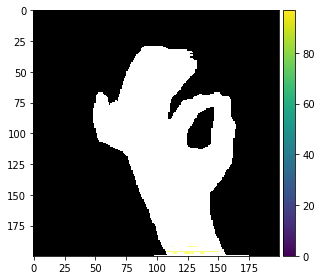

In [ ]:
# Show image
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi/2+0.5,mask,superpixels) )